In [1]:
import numpy as np

In [124]:
#Classe para os elementos bidimensionais do problema de corte        
class Element():
    id_object = 0
    def __init__(self, width, height, name=''):
        self.name = "Item_{:03d}".format(Element.id_object)
        self.width = width
        self.height = height
        Element.id_object+=1
    def __str__(self):
        return self.name + ':(' + str(self.width) + ',' + str(self.height) + ')'

class Container():
    def __init__(self, width, height):
        self.width = width
        self.height = height
    def __str__(self):
        return 'Container('+str(self.width)+","+str(self.height)+")"
    def get_container_dim(self):
        return [self.width, self.height]
        
class Problem2D():
    def __init__(self, list_elements = [], container = [0,0] , demand = []):
        self.num_elements = len(list_elements)
        if self.num_elements > 0:
            self.list_elements = [ Element(x,y) for x,y in list_elements]
        else:
            self.list_elements = []        
        self.container = Container(container[0],container[1])
        if len(demand)==0:
            self.demand = [999]*self.num_elements
        else:
            self.demand = demand
        

    def __str__(self):
        lst_elements = ','.join([str(el) for el in self.list_elements])
        return lst_elements + " " + str(self.container) + str(self.demand)
        
    def load_elements_from_file(self, file):
        pass
    
    def generate_random_problem(self, num_elements, container_width, container_height):
        pass
    
    def to_list(self):
        return [ [el.width, el.height] for el in self.list_elements]
    
    def plot(self, element, position, color = 'bisque', title = '', color_element='seagreen'):
        #position is a triple containing a list with [element, x_position, y_position]
        import matplotlib.pyplot as plt
        from matplotlib.collections import PatchCollection
        from matplotlib.patches import Rectangle
        #prepare data
        element_size = self.to_list()
        container = self.container.get_container_dim()
        cx = container[0]
        cy = container[1]
        #generate rectangles
        all_rect = [ Rectangle((position[ind][0],position[ind][1]),element_size[el][0],element_size[el][1]) for ind,el in enumerate(element)] 
        fig, ax = plt.subplots(1)
        pc = PatchCollection(all_rect, color=color_element, alpha=0.5,
                         edgecolor='black',linewidth=1)
        # Add collection to axes
        ax.add_collection(pc)
        ax.set_facecolor(color) 
        plt.xlim([0,cx])
        plt.ylim([0,cy])
        plt.title(title)
        #plot element dimension
        for ind,el in enumerate(element):
            ax.text(position[ind][0]+element_size[el][0]/2,
                    position[ind][1]+element_size[el][1]/2,
                    '{}x{}'.format(element_size[el][0],element_size[el][1]),
                    horizontalalignment='center',
                    verticalalignment='center', color='k')
        plt.show()
        

class Solution():
    def __init__(self, container = [0,0] ):
        self.list_elements = []
        self.position_elements = []
        self.used_area = 0
        self.control = np.zeros(container[0])
    def __str__(self):
        return 'Elementos:{}\nÁrea:{}\nControle:{}\nPosition:{}'.format(self.list_elements,self.used_area,self.control,self.position_elements)
  
    
class Solver2D():
    def __init__(self, elements, container, demand=[]):
        self.problem = Problem2D(elements, container, demand)
        
    def down_right(self, list_elements, debug = False):
        dim_container = self.problem.container.get_container_dim()
        solution = Solution(dim_container)
        demand = self.problem.demand
        used = [0]*len(demand)
        for el in list_elements:
            orientation = 0
            if el > self.problem.num_elements: #rotated element
                el = el - self.problem.num_elements
                orientation = 90                
            if used[el]<demand[el]:
                solution, inserted = self.put_element_down_right(el, solution, debug = debug, orientation)
                used[el] += inserted*1
        return solution
        
    
    def put_element_down_right(self, element, solution, debug = False, orientation = 0):   
        #check if is possible put the element
        #Rule: if exist an interval with size = width that greatest value is less than height
        if orientation == 0:
            width = self.problem.list_elements[element].width
            height = self.problem.list_elements[element].height
        else:
            width = self.problem.list_elements[element].height
            height = self.problem.list_elements[element].width
        container = self.problem.container.get_container_dim()
        cx = container[0]
        cy = container[1]
        control = solution.control
        position = -1
        pos = width-1
        if cy-max(control[:pos+1]) >= height: #its possible put the element in vertical
            height_ref = control[pos]
            while pos < cx and max(control[:pos+1])<=height_ref: #walk horizontal
                pos+=1
            if pos - width >= 0:
                position = [pos - width, height_ref]
        if position != -1: #
            solution.list_elements.append(element + )
            solution.position_elements.append(position)
            solution.used_area += width * height            
            solution.control = [(height_ref+height if p in range(position[0],position[0]+width) else control[p]) for p in range(cx)]            
        if debug:
            print(position)
            print(solution.control)
            self.problem.plot(solution.list_elements, solution.position_elements)
        inserted = (position!=-1)
        return solution, inserted        
    
    def random_solution(self, size = 100):
        max_value = 0
        area_container = self.problem.container.get_container_dim()
        area_container = area_container[0]*area_container[1]
        area_elements = [x*y for x,y in self.problem.to_list() ]
        min_area = min(area_elements)
        max_elements = area_container // min_area
        for i in range(size):
            seq = np.random.randint(0,self.problem.num_elements,max_elements)
            s = x.down_right(seq, restriction = True)
            if s.used_area > max_value:
                sol_best = s
                max_value = s.used_area
        return sol_best
    
    #def neighboor(self, solution):
        

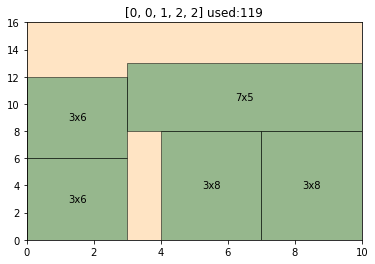

In [134]:
#x = Solver2D([[3,8],[7,5],[3,6],[4,6],[2,2]],[10,10])
x = Solver2D([[3,8],[7,5],[3,6],[4,6]],[10,16],[2,2,2,2])
#x.generate_random_solution()
#s = x.random_solution(size=100)
#x.problem.plot(s.list_elements, s.position_elements, title = str(s.list_elements) + ' used:' + str(s.used_area))
s = x.down_right([0,0,1,1,2,2,3,3], restriction = True, debug = False)
x.problem.plot(s.list_elements, s.position_elements, title = str(s.list_elements) + ' used:' + str(s.used_area))

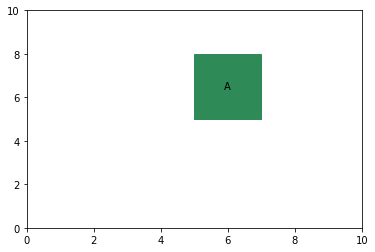

In [41]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1)
ax.axis([0,10,0,10])
r = Rectangle((5,5),2,3, color = 'seagreen')
r.set_label('A')
ax.add_patch(r)
ax.text(6,6.5, 'A',
        horizontalalignment='center',
        verticalalignment='center', color='k')
plt.show()

In [4]:
from __future__ import division

import matplotlib.pyplot as plt
from matplotlib import colors as mcolors


colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
sorted_names = [name for hsv, name in by_hsv]
print(sorted_names)


['black', 'k', 'dimgray', 'dimgrey', 'gray', 'grey', 'darkgray', 'darkgrey', 'silver', 'lightgray', 'lightgrey', 'gainsboro', 'whitesmoke', 'w', 'white', 'snow', 'rosybrown', 'lightcoral', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'r', 'red', 'mistyrose', 'salmon', 'tomato', 'darksalmon', 'coral', 'orangered', 'lightsalmon', 'sienna', 'seashell', 'chocolate', 'saddlebrown', 'sandybrown', 'peachpuff', 'peru', 'linen', 'bisque', 'darkorange', 'burlywood', 'antiquewhite', 'tan', 'navajowhite', 'blanchedalmond', 'papayawhip', 'moccasin', 'orange', 'wheat', 'oldlace', 'floralwhite', 'darkgoldenrod', 'goldenrod', 'cornsilk', 'gold', 'lemonchiffon', 'khaki', 'palegoldenrod', 'darkkhaki', 'ivory', 'beige', 'lightyellow', 'lightgoldenrodyellow', 'olive', 'y', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'greenyellow', 'chartreuse', 'lawngreen', 'honeydew', 'darkseagreen', 'palegreen', 'lightgreen', 'forestgreen', 'limegreen', 'darkgreen', 'g', 'green', 'lime', 'seagreen